# M8HW Assignment: P Burke
## Module 8: Student choice module

Submit this code as a pull request back to GitHub Classroom by the date and time listed in Canvas.

For this assignment, I have selected to .

## Dataset Description



## Data columns

Features:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from datetime import datetime
#from sklearn.model_selection import train_test_split, RandomizedSearchCV
#from sklearn.linear_model import LinearRegression

In [4]:
ATh_track = pd.read_csv('./data/atlantic.csv')

In [9]:
ATh_track.tail(25)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
49080,AL112015,JOAQUIN,20151014,0,,EX,36.0N,9.0W,20,1011,...,0,0,0,0,0,0,0,0,0,0
49081,AL112015,JOAQUIN,20151014,600,,EX,35.5N,8.7W,20,1011,...,0,0,0,0,0,0,0,0,0,0
49082,AL112015,JOAQUIN,20151014,1200,,EX,35.1N,8.4W,20,1011,...,0,0,0,0,0,0,0,0,0,0
49083,AL112015,JOAQUIN,20151014,1800,,EX,35.0N,8.0W,15,1012,...,0,0,0,0,0,0,0,0,0,0
49084,AL112015,JOAQUIN,20151015,0,,EX,35.2N,7.7W,15,1012,...,0,0,0,0,0,0,0,0,0,0
49085,AL122015,KATE,20151108,1800,,TD,22.2N,71.5W,30,1010,...,0,0,0,0,0,0,0,0,0,0
49086,AL122015,KATE,20151109,0,,TD,22.8N,72.6W,30,1010,...,0,0,0,0,0,0,0,0,0,0
49087,AL122015,KATE,20151109,600,,TS,23.4N,73.7W,35,1010,...,0,30,0,0,0,0,0,0,0,0
49088,AL122015,KATE,20151109,1200,,TS,24.1N,74.8W,40,1008,...,0,30,0,0,0,0,0,0,0,0
49089,AL122015,KATE,20151109,1800,,TS,25.0N,75.7W,45,1008,...,0,30,0,0,0,0,0,0,0,0


In [6]:
ATh_track.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,4.910500e+04,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000
mean,1.949802e+07,910.125975,52.005091,-251.406496,-868.671031,-869.315772,-872.676428,-871.409245,-875.570940,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
std,4.461850e+05,671.043363,27.681902,964.313907,353.299666,351.548910,342.153768,345.628984,333.651396,333.133376,330.526085,331.535176,328.027275,327.774794,327.021430,327.408253
min,1.851062e+07,0.000000,-99.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.911110e+07,600.000000,35.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.956093e+07,1200.000000,45.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,1.989081e+07,1800.000000,70.000000,990.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015111e+07,2330.000000,165.000000,1024.000000,710.000000,600.000000,640.000000,530.000000,360.000000,300.000000,330.000000,360.000000,180.000000,250.000000,150.000000,180.000000


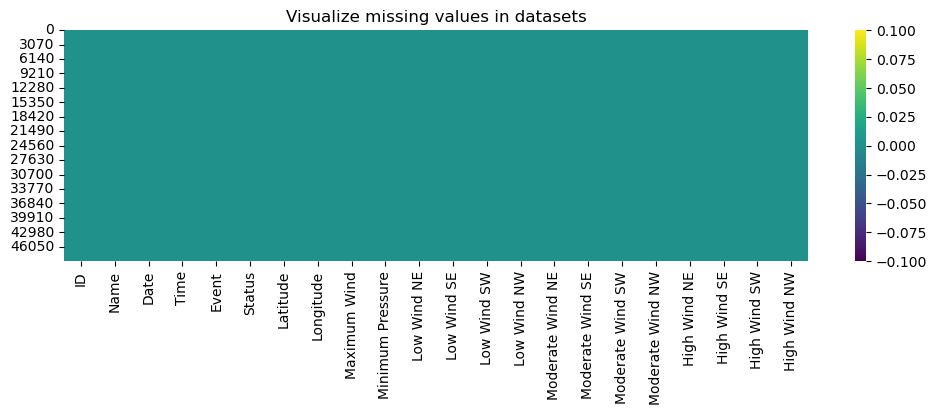

In [10]:
# Check for missing values

plt.figure(figsize=(12, 3))
sns.heatmap(ATh_track.isnull(), cmap='viridis');
plt.title('Visualize missing values in datasets');